In [1]:
from SwapClass import SwapCore
import utilities
import pandas as pd
import xlsxwriter

In [2]:
#files = utilities.getFileNames()
#files = utilities.getFileNames(data_dir="data 12-8-2022")
#files = utilities.getFileNames(data_dir="data 11-8-2022")
#files = utilities.getFileNames(data_dir="data 16-8-2022")
#files = utilities.getFileNames(file_type='CSV',data_dir="data 05-9-2022")
#files = utilities.getFileNames(file_type='CSV',data_dir="data 07-9-2022 v2")

# Getting a list of paths of .csv files in the selected data folder.

files = utilities.getFileNames(file_type='CSV',data_dir="data 26-8-2022")
print(files)
print(len(files))

['data 26-8-2022/0_00.CSV', 'data 26-8-2022/0_25.CSV', 'data 26-8-2022/0_50.CSV', 'data 26-8-2022/0_75.CSV', 'data 26-8-2022/1_00.CSV', 'data 26-8-2022/Ladder_100us.CSV', 'data 26-8-2022/Ladder_200us.CSV']
7


In [3]:
file = files[0] # Select desired file number form list showed above (numbered form 0). ALternatively provide path in the form of a string.
params = utilities.find_parameters(file,rows_to_skip=2)
print(params) 

# Sometimes found `roll_strength` parameter doesn't show good results- in that case parameter
# can be overwritten below - usually a bit larger or smaller value should do the trick.
# (Currently set value is listed below this block.) 
                    
#params.PeakWidth = 150 # uncomment and set value to overwrite `roll_strength` parameter

   PeakWidth  maxPeakDist  avgHeight
0      151.0        377.0   0.193103


Found signals count (including ones with signal being higher or lower than both ref signals): 9


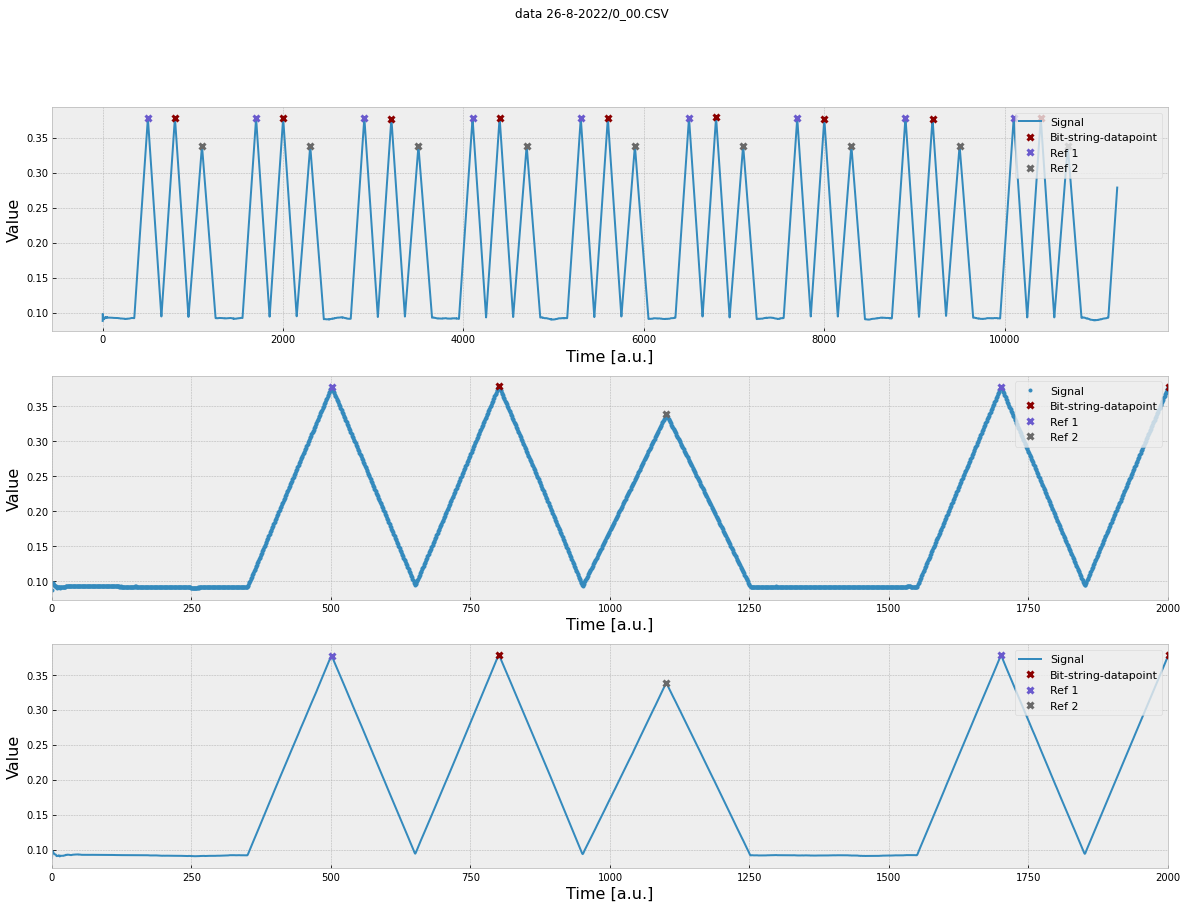

In [10]:
signal = SwapCore(file,rows_to_skip=2)

signal.set_parameters(
                        max_peak_distance = int(params["maxPeakDist"]),
                        min_height_peak = params["avgHeight"][0],
                        roll_strength = int(params["PeakWidth"]))                        


# Set `x`,`y` limits for the second and third plot (values are also used later for comparison chart).
x = 0
y = 2000
signal.plot([x,y])

,ref1,ref2,dataPoint,Pn
count,9.000000,9.000000,9.000000,9.000000
mean,0.377616,0.338104,0.377625,1.000432
std,0.000364,0.000378,0.000810,0.024908
min,0.377298,0.337377,0.376477,0.958580
25%,0.377351,0.338013,0.377139,0.977850
50%,0.377430,0.338146,0.377616,1.005976
75%,0.377854,0.338464,0.378411,1.022865
max,0.378305,0.338490,0.378755,1.029312


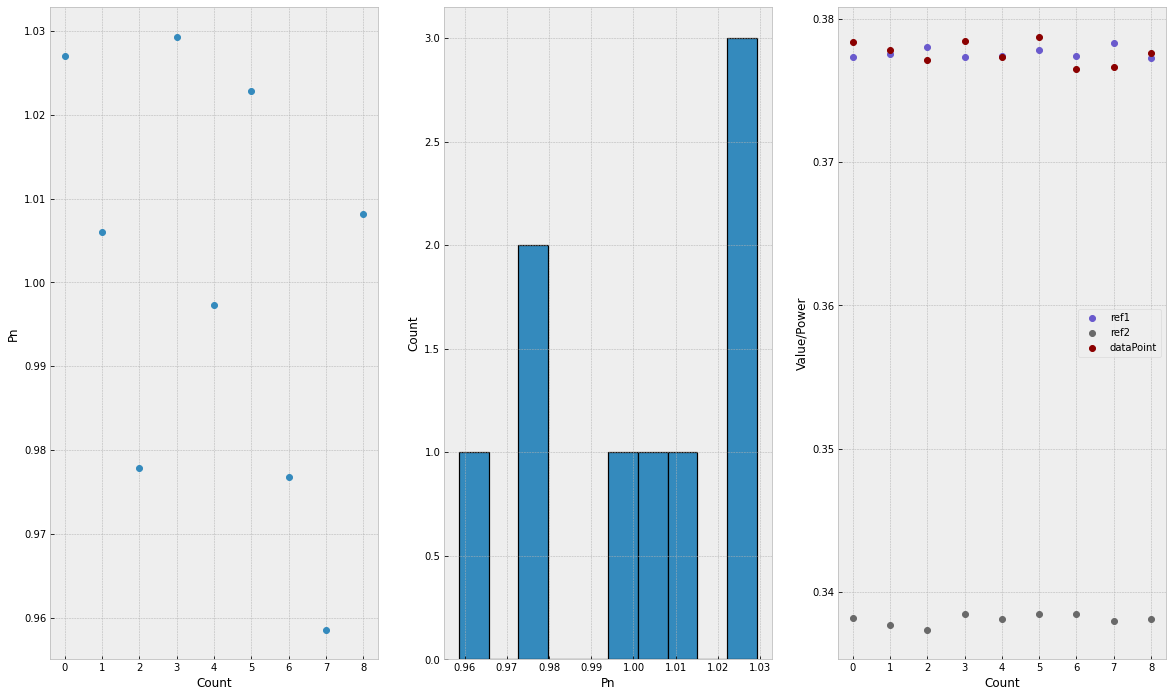

In [5]:
# Plotting statistics and visualizing found peaks.

peaks = signal.analyze_peaks()
peaks.drop(['ref1_index','ref2_index','dataPoint_index'],axis=1, inplace=True)
utilities.plotStats(peaks)
peaks.describe()

In [6]:
# Full table of found peaks and values.
peaks

,ref1,ref2,dataPoint,Pn
0,0.377351,0.338172,0.378411,1.027045
1,0.377563,0.337669,0.377801,1.005976
2,0.378040,0.337377,0.377139,0.977850
3,0.377325,0.338464,0.378464,1.029312
4,0.377430,0.338146,0.377325,0.997303
5,0.377854,0.338464,0.378755,1.022865
6,0.377377,0.338490,0.376477,0.976839
7,0.378305,0.338013,0.376636,0.958580
8,0.377298,0.338146,0.377616,1.008119


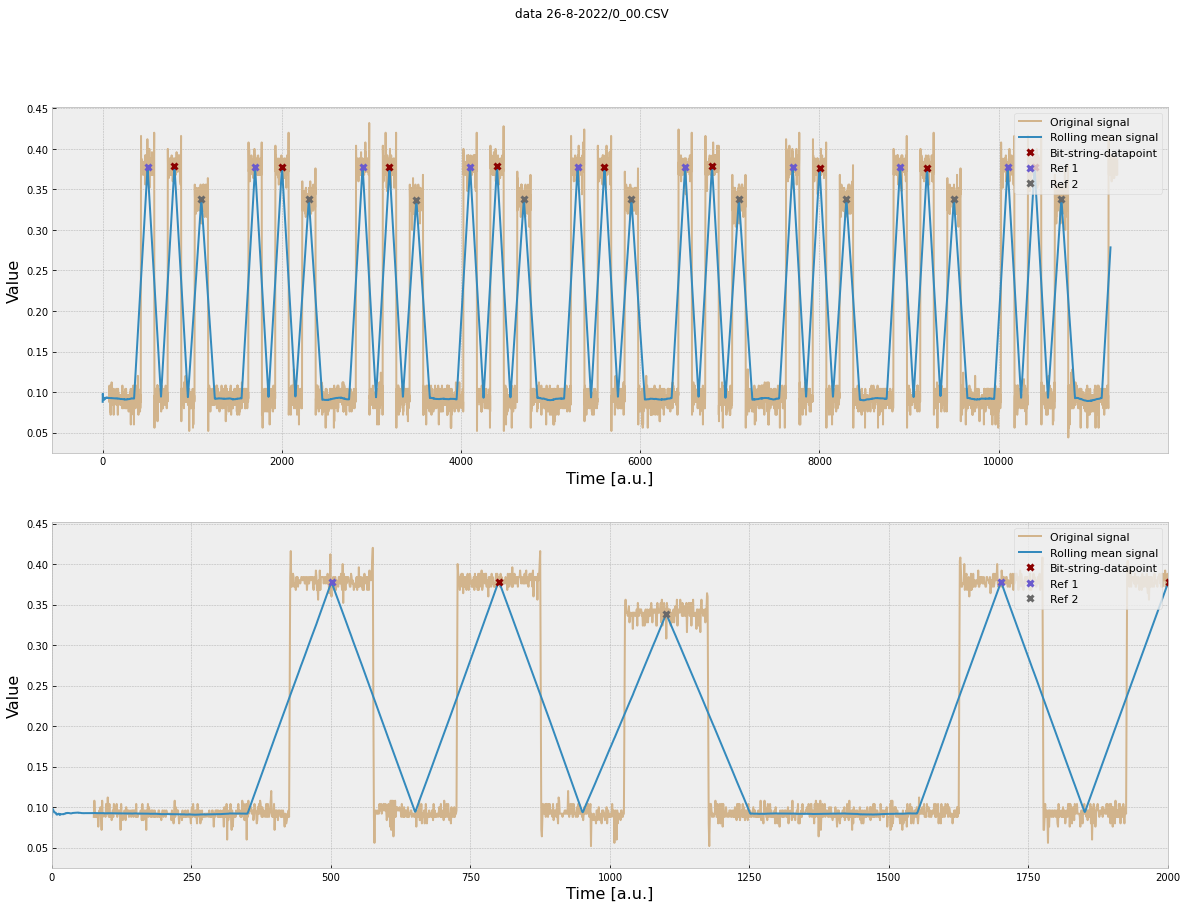

In [7]:
# Comparison between original and averaged signal with found peaks. Won't work if `analysis_without_correction` and `rolling_mean_signal` are set to `False`.
signal.compare_rolling_mean_with_original(x_lim=[x,y])

In [8]:
# Showing time interval of the signal.

signal.calculate_time_interval()

Time interval counts:
0.00008    2138
0.00008    1392
0.00008    1289
0.00008    1127
0.00008     955
           ... 
0.00008       2
0.00008       2
0.00008       2
0.00008       2
0.00008       2
Name: interval, Length: 73, dtype: int64
Interval mean = 8e-05, std = 1.646229504860133e-08


In [9]:
# This code block exports (averaged) signal values and found peak values into .xlsx file.

df = pd.DataFrame.from_dict({'time':signal.time_array,'value':signal.value_array})
peaks = signal.analyze_peaks()

utilities.write_to_xlsx(df,peaks,file)